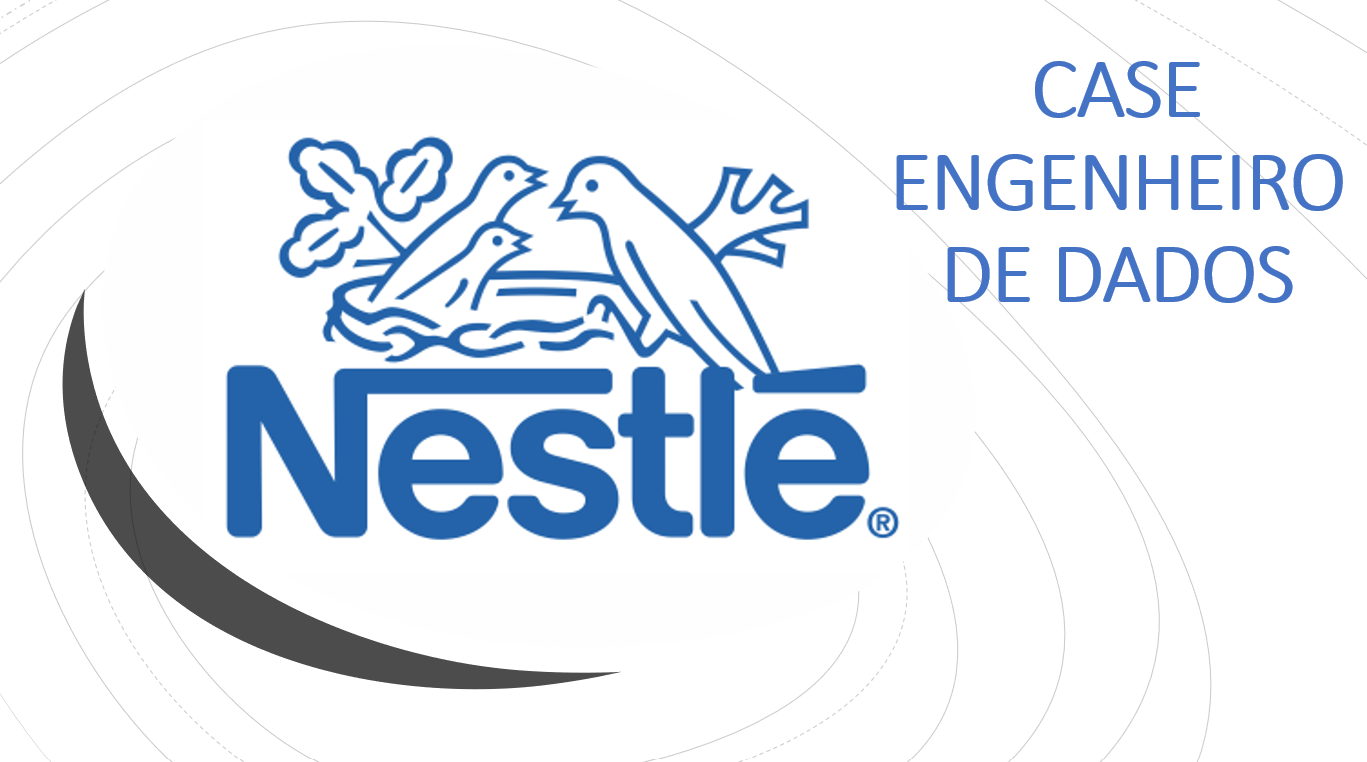

> # Bibliotecas
---

In [129]:
# Tratamento e Manipulação
import pandas as pd
import numpy  as np
import datetime

# Visualização
import matplotlib.pyplot as plt
import seaborn           as sns

# Configuração
pd.set_option('max.columns', 55)
plt.style.use('bmh')

> # Leitura da base
---

In [130]:
df = pd.read_csv('../Dados/Finalizados/BaseClientes.csv', sep=';', parse_dates=['Data Início Contrato'])
df.head()

,Cliente,Valor Contrato Anual,Quantidade de Serviços,Cargo,CEP,Data Início Contrato,Nivel de Importancia,Nível,Área,COD Área,COD Nível,Quadro,Bonus,Contratacao,Estado,Região
0,Teixeira Gonçalves,54000.0,37,ADIII,743419711,2019-03-15,3.0,Coordenador,Administrativo,BAC,DB,Terceiro,N,RH,Amazonas,Norte
1,Souza Santos,126000.0,12,FIIV,882467283,2019-08-04,1.0,Gerente,Financeiro,CBB,ID,Efetivo,S,Diretoria,Roraima,Norte
2,Emídio Alves,319500.0,23,ADII,295150983,2019-09-02,3.0,Analista,Administrativo,BAC,DB,Terceiro,N,RH,Pernambuco,Nordeste
3,Peres Koch,306000.0,35,LOV,395907462,2018-12-14,3.0,Diretor,Logísitca,EDE,JE,Efetivo,S,Diretoria,Mato Grosso,Centro - Oeste
4,Pacheco Guimaraes,112500.0,75,COII,669105848,2019-01-27,4.0,Analista,Comercial,JAA,DB,Terceiro,N,RH,Rio de Janeiro,Sudeste


### Criação de colunas auxiliares

In [131]:
# Coluna Ano
df['Ano Inicio Contrato'] = df['Data Início Contrato'].apply(lambda x: x.strftime("%Y"))

# Coluna mês
df['Mês Inicio Contrato'] = df['Data Início Contrato'].apply(lambda x: x.strftime("%m"))

### Distribuição dos dados

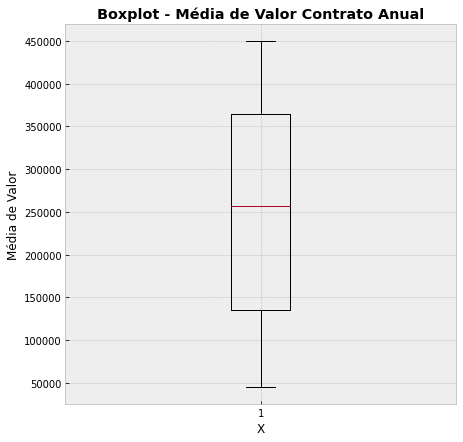

In [132]:
plt.figure(figsize=(7,7))

plt.boxplot(df['Valor Contrato Anual'])

plt.title('Boxplot - Média de Valor Contrato Anual', fontweight="bold") 
plt.xlabel('X') 
plt.ylabel('Média de Valor')

plt.show()

### Clientes e Valor Médio de Contrato Anual

In [133]:
df.groupby(['Ano Inicio Contrato', 'Mês Inicio Contrato']).agg({'Cliente':pd.Series.nunique,
                                                                'Valor Contrato Anual':np.mean})

Cliente  Valor Contrato Anual
Ano Inicio Contrato Mês Inicio Contrato                               
2018                02                         3         175500.000000
                    04                         3         283500.000000
                    05                         1          58500.000000
                    06                         2         398250.000000
                    07                         5         349200.000000
                    08                         3         277500.000000
                    09                         3         249000.000000
                    10                        25         232380.000000
                    11                        32         268875.000000
                    12                        35         258685.714286
2019                01                        48         256125.000000
                    02                        40         259875.000000
                    03                        44         256806.818182
                    04                        14         179678.571429
                    05                        10         261450.000000
                    06                         9         185000.000000
                    07                         7         181928.571429
                    08                         6         339000.000000
                    09                         6         237750.000000
                    10                         9         259000.000000
                    11                         6         249000.000000
                    12                        10         205650.000000

### Média de Valor Contrato Anual x Mês 

In [134]:
def geraScatter(df, ano):
    
    # DataFrame
    auxDf = df[df['Ano Inicio Contrato'] == ano]
    
    # FigSize
    plt.figure(figsize=(15,6))
    
    # Datas
    dates = sorted(auxDf['Mês Inicio Contrato'].unique())
    
    # Eixo X
    x = auxDf.groupby('Mês Inicio Contrato')['Valor Contrato Anual'].mean()
    x = x.sort_index()
    
    plt.plot_date(dates, x, 'g', linestyle='--')
    plt.title(f'Média de Valor Contrato Anual x Mês {ano}', fontweight="bold") 
    plt.xlabel('Mês') 
    plt.ylabel('Média de Valor Contrato Anual')
    
    plt.show()    

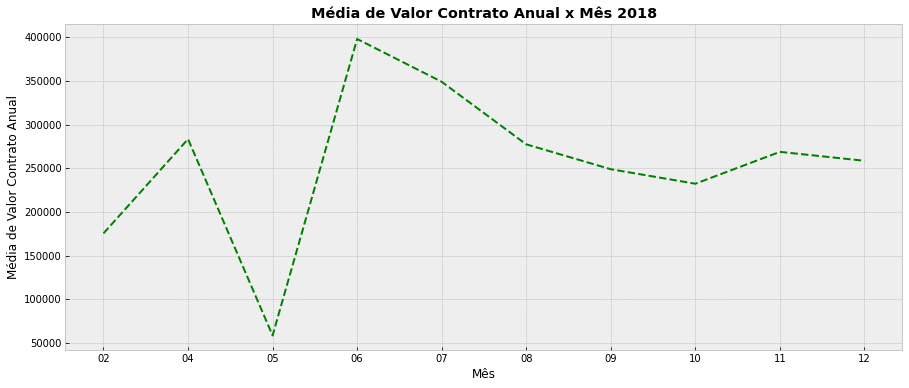

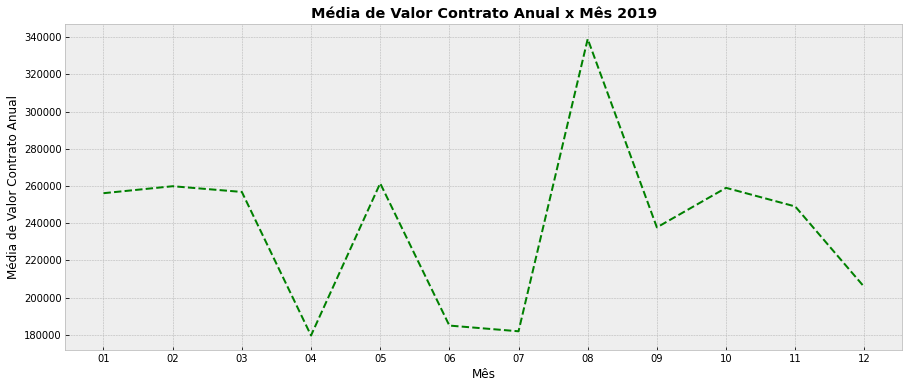

In [128]:
for ano in sorted(df['Ano Inicio Contrato'].unique()):
    geraScatter(df, ano)

### Níveis e áreas que tem mais clientes e valor contrato anual máximo

In [179]:
df.groupby(['Nível', 'Área']).agg({'Cliente':pd.Series.nunique,
                                   'Valor Contrato Anual':np.max})

Cliente  Valor Contrato Anual
Nível       Área                                         
Analista    Administrativo       11              319500.0
            Comercial            18              441000.0
            Financeiro           18              418500.0
            Logísitca            14              436500.0
            Operações            15              400500.0
Coordenador Administrativo       17              436500.0
            Comercial            18              418500.0
            Financeiro           18              450000.0
            Logísitca            15              445500.0
            Operações            18              441000.0
Diretor     Administrativo       17              445500.0
            Comercial            12              441000.0
            Financeiro            9              405000.0
            Logísitca            14              450000.0
            Operações            30              441000.0
Gerente     Administrativo       15              445500.0
            Comercial            13              441000.0
            Financeiro           22              445500.0
            Logísitca            15              369000.0
            Operações            12              427500.0

### Nível de Importância

3.0    91
4.0    91
1.0    71
2.0    68
Name: Nivel de Importancia, dtype: int64

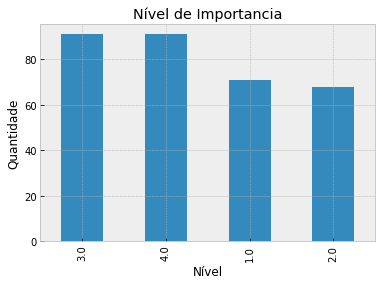

In [150]:
display(df['Nivel de Importancia'].value_counts())

df['Nivel de Importancia'].value_counts().plot(kind='bar', title='Nível de Importancia', xlabel='Nível', ylabel='Quantidade')

plt.show()

In [153]:
df.groupby(['Nivel de Importancia', 'Nível']).agg({'Cliente':pd.Series.nunique, 'Valor Contrato Anual':np.mean})

Cliente  Valor Contrato Anual
Nivel de Importancia Nível                                     
1.0                  Analista          18         196500.000000
                     Coordenador       17         267352.941176
                     Diretor           16         262125.000000
                     Gerente           20         209700.000000
2.0                  Analista          18         269750.000000
                     Coordenador       17         253852.941176
                     Diretor           18         249750.000000
                     Gerente           15         269400.000000
3.0                  Analista          24         235500.000000
                     Coordenador       21         263357.142857
                     Diretor           25         242640.000000
                     Gerente           21         279428.571429
4.0                  Analista          16         261562.500000
                     Coordenador       31         240532.258065
                     Diretor           23         273130.434783
                     Gerente           21         247928.571429

### Valor por Serviço

In [159]:
df['Valor por Serviço'] = df['Valor Contrato Anual'] / df['Quantidade de Serviços']

In [166]:
mediaServiço = round(int(df['Valor por Serviço'].mean()), 2)
print(f'O valor médio por serviço é de : {mediaServiço}.00')

O valor médio por serviço é de : 6240.00
